In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
from PIL import Image
from os.path import join
import os
import time
import csv

In [2]:
#path="/home/ubuntu/tess_train_data_prep/text_csv/tamil/good_tamil.csv"
path = '/home/srihari/Downloads/scene_text/all_data_combined/final_evaluation_csv.csv'
crops_path ='/home/srihari/Downloads/scene_text/all_data_combined/hindi/'
report_file = '/home/srihari/Downloads/scene_text/all_data_combined/curated_data.csv'

In [9]:
def append_to_report(r_file, error_p):
    with open(r_file, 'a') as f:
        writer = csv.writer(f)
        writer.writerow(error_p)
        
        
def generate(i):
    img = cv2.imread(join(crops_path,df['crop_name'][i]))
    #print(img)
    key = df['crop_name'][i]
    #print(df['g_conf'][i])
    print_diff_loc(str(df["tess_text"][i])[1:] ,str(df["gt_text"][i]))
    print(df['mismatch_count'][i])
    #pyperclip.copy(str(df["gt_text"][i]))
    print(df['score'][i])

    return df['score'][i],img,key,"GROUND  =>"+str(df["groundTruth"][i]),"TESS_BASE=> "+str(edit_google(df["gt_text"][i])),"TESS_TRAINED=>"+str(df["tess_text"][i])


def print_diff_loc(str1,str2):
    str1 = str1.replace(' ','')
    str2 = str2.replace(' ','')
    if len(str1) > len(str2):
        iter_string = str2
    else :
        iter_string = str1
    break_index = 0
    for loc in range(len(iter_string)):
        break_index += 1
        if str1[loc] != str2[loc]:
            break
             
    print("\x1b[31m\"{}\"\x1b[0m".format(iter_string[:break_index]))
    
def edit_google(s):
    s1=s
    try:
        i=0
        while(i<len(s)):
            s1=s
            if s[i] in ["/","।",'।' ,':','|',"," ,'०',"]","-",")","}"] and s[i-1]==" ":    
                s=s[:i-1]+s[i:]
                if i > 0 :
                    if s[i-1] in ["-","[","{","/","("] and s[i]==" ":
                        s=s[:i]+s[i+1:]
            elif s[i] in ["-","[","{","/","("] and s[i+1]==" ":
                s=s[:i+1]+s[i+2:]
            i=i+1
        #print(s)
    except:
        print("ERROR IN GOOGLE CORRECTION")
        return s1
    return s
    

In [10]:
def init_file():
    if not os.path.exists(report_file):
        columns = ['key','error_type','groundTruth']
        text = ','.join(columns) + '\n'
        with open(report_file, "a") as txtfile:
            txtfile.write(text)

In [11]:
df = pd.read_csv(path)

In [12]:
df.head()

,Unnamed: 0,groundTruth,gt_text,tess_text,score,gt_len,mismatch_count,crop_name
0,0,सक्त मनाही है,ELAS,ELAS,1.0,4,0,0a3aff87-007d-4d37-80ce-20e52e4ee2bb281082cb-f...
1,1,CONTRACTOR NAME: M/s . MURALI ARTS,CONTRACTOR NAME : M/s. MURALI ARTS,CONTRACTOR NAME : M/s. MURALI ARTS,1.0,29,0,0a0f0ab1-771e-42dd-8a69-575dfe5f5c4b1512a101-2...
2,2,733,733\n,733\n,1.0,5,0,0a2acd92-0305-4f99-9166-0cc4b512d60397.png


In [13]:
init_file()

1
"CONTRACTORNAME:M/s.MURALIARTS"
0
1.0
0a0f0ab1-771e-42dd-8a69-575dfe5f5c4b1512a101-2ed2-45bf-b6e0-919ee3ef9b81.png


<Figure size 432x288 with 0 Axes>

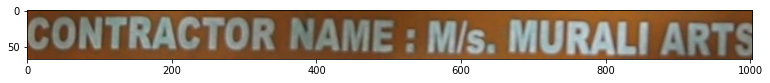

GROUND  => CONTRACTOR NAME: M/s . MURALI ARTS
TESS_BASE=>  CONTRACTOR NAME: M/s. MURALI ARTS
TESS_TRAINED=> CONTRACTOR NAME : M/s. MURALI ARTS
score is : 1.0


KeyboardInterrupt: Interrupted by user

In [16]:
for i in range(0,5000):
    #try :
    print(i)
    plt.figure(figsize=(13,3))
    scoreees,p,key,ground,tess,trained=generate(i)
    #if scoreees >= 0.9:
#         a.append(scoreees)
# print(len(a),"**************")
    print(key)
    #plt.axis('off')
    plt.imshow(np.array(p))
    plt.show()
    print(ground)
    print(tess)
    print(trained)
    print("score is :",scoreees)
    #
    check = input()
#     while check == '':
#         print("Please enter some input")
#         check = input()
    if check == '':
        append_to_report(report_file,[key,check,ground[8:]])
#     if check == '-4':
#         append_to_report(report_file,[key,check,ground[8:]])

    if check not in ['s','S','','8']:
        if check not in ['w','W']:
            if check == '-1':
                append_to_report(report_file,[key,check,tess[8:]])
            else:
                append_to_report(report_file,[key,check,ground[8:]])
        else :
            print("Type of error in tesseract")
            check = input()

            if check != '-1':
                print("Enter the corrected text")
                corrcted_ground = input()
            else:
                corrcted_ground = tess[8:]


            append_to_report(report_file,[key,check,corrcted_ground])
    plt.clf()
#     except Exception as e:
#         print('Error in processing {} due to {}'.format(key,e))
    clear_output(wait = True)

####tamil error class  
'''
class -3 :  google vision is correct
Class -2 : Manual intervention required 
class -1 : tesseract correct
class 0 : charater mismatch
Class 1 : 2 as 2.0, 1.40 as 1.0, 14 as 1, etc.  ( digit error)
Class 2 : மற்றும் as மற்றும, சேரி as சேர, etc.  (Auxiliaries)
Class 3 : / as |, " as ' ', etc        (Special characters)
Class 4 : கிடங்கு as யபI, கடனாக as -IபI, etc. (contradiction)
Class 5 : கடலுர் as             (Missing text)
Class 6 : Text repeatation

'''


####kannada error class  




'''
Class -2 : Manual intervention required 
class -1 : tesseract correct
class 0 : charater mismatch ಕೆ as ಕ
Class 1 : ೧೧ . as NAN, ೧೧ . as 1, 2 as 2.0, 1.40 as 1.0, 14 as 1, etc.  ( digit error)
Class 2 : ಚಿಹ್ನೆಗಳು as ಚಿಹೆಗಳು,  ಬಾಗಲಕೋಟ as ಬದಾಗಲಕೋಟ, ಎಲ್ಎಕೂ as ಎಲ್‌ಎಕ್ಯೂ etc.  (Auxiliaries)
Class 3 : / as |, " as ' ', etc        (Special characters)
Class 4 : கிடங்கு as யபI, கடனாக as -IபI, etc. (contradiction)
Class 5 : ಅರ್ಜೆಂಟಿನಾ as             (Missing text and crop issue)
Class 6 : Text repeatation

'''

####Bengali error class  
    
'''
Class -2 : Manual intervention required 
class -1 : tesseract correct
class 0 : charater mismatch ಕೆ as ಕ
Class 1 : ২ as NAN, ২ as 2, 2 as 2.0, 1.40 as 1.0, 14 as 1, etc.  ( digit error) 
Class 2 : সংবিধানের as সৰ্ধাবধানের   etc.  (Auxiliaries)
Class 3 : / as |, " as ' ', etc        (Special characters)
#Class 4 : கிடங்கு as யபI, கடனாக as -IபI, etc. (contradiction)
Class 5 : সংবিধানের as             (Missing text)
Class 6 : Text repeatation

'''

'''
Line data curation:

1. Hit enter when google vision is true.

2. Use -1 when tesseract is correct.

3. Hit enter when both tesseract and google vision is true.

4. Use “w” when we can correct the ground truth using tesseract and google vision text.

5. Use -2 when we can’t correct the ground truth.

6. Use “s” when the image is not properly cropped(check matras,first word,last word),empty , too noisy,more than 2 lines and contain any diagram.

'''

In [18]:
df[df['crop_name']=='decffc0c-8542-4c97-83cb-1888341eb7f2.png']

,Unnamed: 0,gt_text,tess_text,score,gt_lenght,mismatch_count,exp,coord,image_name,crop_name,ocr_conf
20662,42497,50,0),0.0,2,2,tess_baseline_Devanagari,"{'boundingBox': {'vertices': [{'x': 2768, 'y':...",OutcomeBudgetH2021_2022_220_fd63650c-dbfa-409d...,decffc0c-8542-4c97-83cb-1888341eb7f2.png,"{'text': ['0)'], 'conf': [60]}"


In [ ]:
मेंमें